In [66]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import seaborn as sns

import matplotlib
import matplotlib.patches as mpp

We are going to extract the PCS Claims data from the github mentioned.

## EDA

In [67]:
data = pd.read_table("/Users/archibaldgonah/Desktop/Masters work/Code-Work/data/ncl.dat", delim_whitespace=True, header=None)

In [68]:
data.head()

,0,1,2,3,4
0,900107,0.016438,59446625.0,0.000000,1
1,900209,0.106850,184078130.0,0.090411,1
2,900216,0.126030,26296875.0,0.019178,1
3,900313,0.194520,130769230.0,0.068493,1
4,900405,0.257530,110981380.0,0.063014,2


In [69]:
# Function to convert 'yymmdd' to 'YYYY-MM-DD'
def convert_date(date_int):
    date_str = str(date_int)  # Convert integer to string
    date_obj = datetime.strptime(date_str, '%y%m%d')
    return date_obj.strftime('%Y-%m-%d')

In [70]:
# Apply the conversion function to the 'Date' column
data[0]= data[0].apply(lambda x: convert_date(x))
# Convert 'Date' column to datetime format
data[0] = pd.to_datetime(data[0])

In [71]:
data.head()

,0,1,2,3,4
0,1990-01-07,0.016438,59446625.0,0.000000,1
1,1990-02-09,0.106850,184078130.0,0.090411,1
2,1990-02-16,0.126030,26296875.0,0.019178,1
3,1990-03-13,0.194520,130769230.0,0.068493,1
4,1990-04-05,0.257530,110981380.0,0.063014,2


In [72]:
data.info()
# no nun values
# columns are in correct format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       342 non-null    datetime64[ns]
 1   1       342 non-null    float64       
 2   2       342 non-null    float64       
 3   3       342 non-null    float64       
 4   4       342 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 13.5 KB


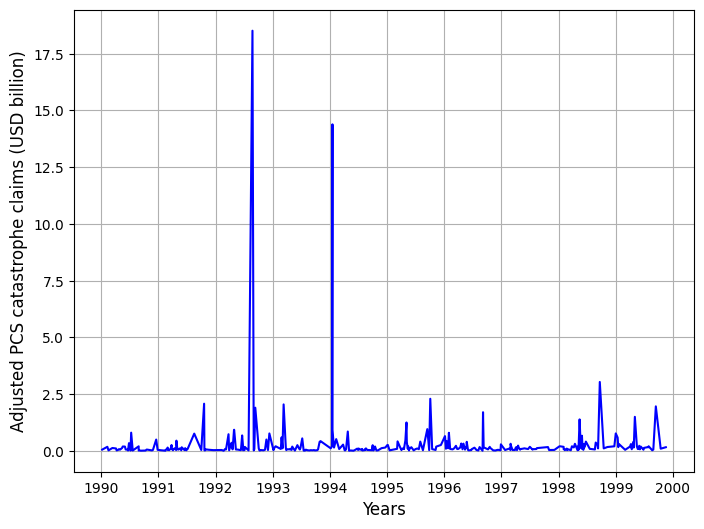

In [73]:
# Extracting columns to plot
x = data[0].values
y = data[2].values / 1e+09

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, linestyle='-', color='b', label='Value')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Adjusted PCS catastrophe claims (USD billion)', fontsize=12)
plt.grid(True)


plt.show()

## PCA Analysis

In [74]:
data[2] = data[2].values / 1e+09

In [75]:
data.head()

,0,1,2,3,4
0,1990-01-07,0.016438,0.059447,0.000000,1
1,1990-02-09,0.106850,0.184078,0.090411,1
2,1990-02-16,0.126030,0.026297,0.019178,1
3,1990-03-13,0.194520,0.130769,0.068493,1
4,1990-04-05,0.257530,0.110981,0.063014,2


In [76]:
# The function is designed to format and enhance the visual appearance of a plot that shows explained 
# variance along principal components (PCs) in PCA (Principal Component Analysis)


def tidy_up_expl_var_plot(ax, close=True):
    plt.gcf().set_size_inches(8,4)

    ax.set_xticks(np.arange(0,pca.n_components_+1))
    ax.set_xlim(0.4,pca.n_components_ + 0.6)
    ax.set_yticklabels(["{:d}%".format(x) for x in np.arange(0,110,step=20)], 
                              fontsize=12)
    ax.axhline(1, linestyle="--", color="grey")
    ax.set_xlabel("$k$", fontsize=16)
    ax.set_ylabel("% Explained Variance", fontsize=16);

/var/folders/q1/n1z4xy556cjbxzn0zg0twy3m0000gn/T/ipykernel_26889/347955173.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:d}%".format(x) for x in np.arange(0,110,step=20)],


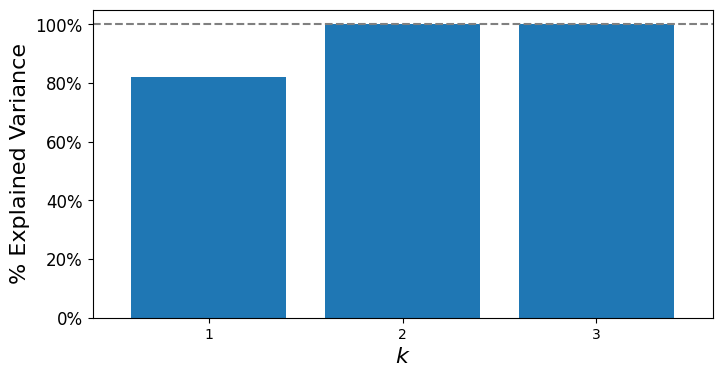

In [77]:
food_proc = StandardScaler(with_std=False).fit_transform(data.iloc[:, 1:4])
pca = PCA()
food_pca = pca.fit(food_proc)
expl_var_pct = np.cumsum(food_pca.explained_variance_ratio_)
        
                
plt.bar(np.arange(pca.n_components_)+1, expl_var_pct)
tidy_up_expl_var_plot(plt.gca())

In [78]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data.iloc[:, 1:4])

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [79]:
pca.components_

array([[ 9.99966919e-01, -8.11549529e-03,  5.47636172e-04],
       [ 8.11516087e-03,  9.99966885e-01,  6.10146909e-04]])

In [80]:
# Check out the eigen values that correspond to each eiegn vector
pca.explained_variance_

array([7.75355907, 1.69087629])

In [81]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [82]:
principalDf

,principal component 1,principal component 2
0,-4.811345,-0.276962
1,-4.721898,-0.151546
2,-4.701477,-0.309209
3,-4.633810,-0.204155
4,-4.570645,-0.223434
...,...,...
337,4.815970,-0.228026
338,4.834900,-0.197683
339,4.863259,1.706863
340,4.963410,-0.156970


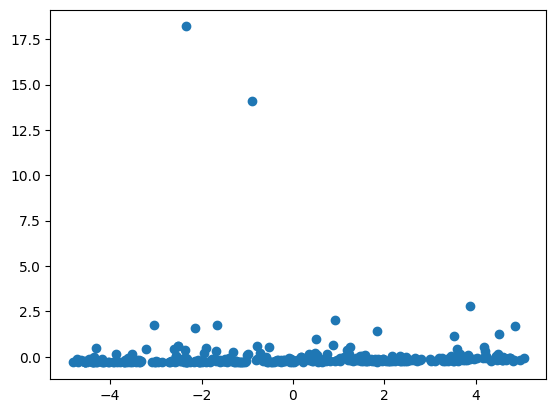

In [83]:
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1])

In [84]:
# create a new feature 
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(data.iloc[:, 1:4])

principalDf_1 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [85]:
principalDf_1

,principal component 1
0,-4.811345
1,-4.721898
2,-4.701477
3,-4.633810
4,-4.570645
...,...
337,4.815970
338,4.834900
339,4.863259
340,4.963410


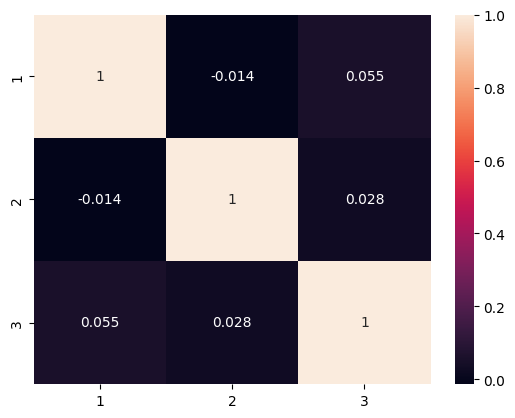

In [86]:
# Calculate correlation coefficients (Pearson's default)
correlation_matrix = data.iloc[:, 1:4].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

No significant correlations.